# <font color='#17BFAE'>Predict the New York City Subway Ridership</font>

## <font color='1AA3D9'>Overview</font>

This is my first project (out of five) of Udacity Data Analyst Nanodegree. In this project, I work on the NYC Subway data to draw an interesting conclusion about the dataset itself and especially to figure out if more people ride the subway when it is raining versus when it is not raining.

Data Science Skills Applied:

 - Data wrangling
 - Linear regression and statistical tests
 - Effective visualization

### <font color='1AB6D9'>Browse Data - List of Turnstile and Weather Variables</font> 

**`UNIT`**    Remote unit that collects turnstile information. Can collect from multiple banks of turnstiles. Large subway stations can have more than one unit.  
**`DATEn`**   Date in “yyyy-mm-dd” (2011-05-21) format.  
**`TIMEn`**   Time in “hh:mm:ss” (08:05:02) format.  
**`ENTRIESn`**   Raw reading of cummulative turnstile entries from the remote unit. Occasionally resets to 0.  
**`EXITSn`**   Raw reading of cummulative turnstile exits from the remote unit. Occasionally resets to 0.  
**`ENTRIESn_hourly`**   Difference in ENTRIES from the previous REGULAR reading.  
**`EXITSn_hourly`**   Difference in EXITS from the previous REGULAR reading.  
**`datetime`**   Date and time in “yyyy-mm-dd hh:mm:ss” format (2011-05-01 00:00:00). Can be parsed into a Pandas datetime object without modifications.  
**`hour`**   Hour of the timestamp from TIMEn. Truncated rather than rounded.  
**`day_week`**   Integer (0 - 6 Mon - Sun) corresponding to the day of the week.  
**`weekday`**   Indicator (0 or 1) if the date is a weekday (Mon - Fri).  
**`station`**   Subway station corresponding to the remote unit.  
**`latitude`**   Latitude of the subway station corresponding to the remote unit.  
**`longitude`**   Longitude of the subway station corresponding to the remote unit.  
**`conds`**   Categorical variable of the weather conditions (Clear, Cloudy etc.) for the time and location.  
**`fog`**   Indicator (0 or 1) if there was fog at the time and location.  
**`precipi`**   Precipitation in inches at the time and location.  
**`pressurei`**   Barometric pressure in inches Hg at the time and location.  
**`rain`**   Indicator (0 or 1) if rain occurred within the calendar day at the location.  
**`tempi`**   Temperature in °F at the time and location.  
**`wspdi`**   Wind speed in mph at the time and location.  
**`meanprecipi`**   Daily average of precipi for the location.  
**`meanpressurei`**   Daily average of pressurei for the location.  
**`meantempi`**   Daily average of tempi for the location.  
**`meanwspdi`**   Daily average of wspdi for the location.  
**`weather_lat`**   Latitude of the weather station the weather data is from.  
**`weather_lon`**   Longitude of the weather station the weather data is from.  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ggplot import *
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from IPython.display import Image

In [3]:
turnstile = pd.read_csv("./improved-dataset/turnstile_weather_v2.csv", parse_dates=['DATEn'])

In [4]:
turnstile.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly', u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday', u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi', u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi', u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat', u'weather_lon'], dtype='object')

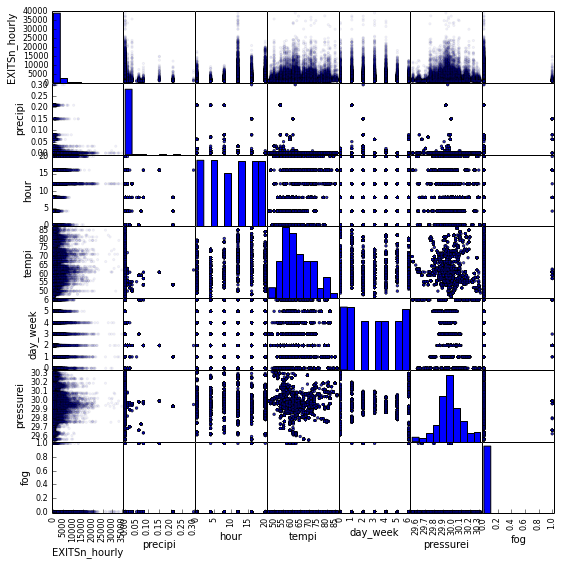

In [5]:
turnstile_sub = turnstile[["EXITSn_hourly","precipi","hour","tempi","UNIT","day_week","pressurei","fog","conds"]]
a = pd.scatter_matrix(turnstile_sub,alpha=0.05,figsize=(9,9), diagonal='hist')

I examined the scatter matrices of different combinations of the possible explanatory variables to make sure the variables I include in the model are not highly correlated. And the graph above shows the pairwise relationship of most of the explanatory variables included in the final model.

## <font color='00ADFF'>Section 1. Statistical Test</font>

**1. Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value?**  
I used Mann–Whitney U test based on the observation of non-normal distribution of the data. The null hypothesis of the test is  
The distributions of $ENTRIESn\_hourly_{rainy}$ and $ENTRIESn\_hourly_{non-rainy}$ are the same,  
versus the alternative hypothesis:  
The distributions of $ENTRIESn\_hourly_{rainy}$ and $ENTRIESn\_hourly_{non-rainy}$ differ by a location shift $\mu$ and $\mu \neq 0$  
Since the difference of riderships between rainy and non-rainy days can go both directions, the two-tailed P value is more appropriate here.

**2. Why is this statistical test applicable to the dataset?**  
According to [the wikipedia page of Mann–Whitney U test](http://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test), Mann–Whitney U test is a non-parametric test that is good for testing whether a particular population tends to have larger values than the other. That is exactly what we are after.   

**3. What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.**    
As printed below, the two-tailed p-value is 5.48213914249e-06. The mean of `ENTRIESn_hourly` on non-rainy days and rainy days are 1845.53943866 and 2028.19603547 respectively.  

**4. What is the significance and interpretation of these results?**  
Set the significance level $\alpha = 0.05$, the p-value is far less than $\alpha$. So the result would be considered statistically significant and the null hypothesis would be rejected.  


In [9]:
z_stats, p_val = scipy.stats.mannwhitneyu(turnstile.ENTRIESn_hourly[turnstile.rain==1], turnstile.ENTRIESn_hourly[turnstile.rain==0])
print "The U-statistics is the test is "+str(z_stats)+" and the two-tailed p-value is "+ str(p_val*2)
print "The 1st quartile of ENTRIESn_hourly on non-rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==0], 25))
print "The 1st quartile of ENTRIESn_hourly on rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==1], 25))
print "The median of ENTRIESn_hourly on non-rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==0], 50))
print "The median of ENTRIESn_hourly on rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==1], 50))
print "The 3rd quartile of ENTRIESn_hourly on non-rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==0], 75))
print "The 3rd quartile of ENTRIESn_hourly on rainy days is " + str(np.percentile(turnstile.ENTRIESn_hourly[turnstile.rain==1], 75))
print "The mean of ENTRIESn_hourly on non-rainy days is " + str(np.mean(turnstile.ENTRIESn_hourly[turnstile.rain==0]))
print "The mean of ENTRIESn_hourly on rainy days is " + str(np.mean(turnstile.ENTRIESn_hourly[turnstile.rain==1]))

The U-statistics is the test is 153635120.5 and the two-tailed p-value is 5.48213914249e-06
The 1st quartile of ENTRIESn_hourly on non-rainy days is 269.0
The 1st quartile of ENTRIESn_hourly on rainy days is 295.0
The median of ENTRIESn_hourly on non-rainy days is 893.0
The median of ENTRIESn_hourly on rainy days is 939.0
The 3rd quartile of ENTRIESn_hourly on non-rainy days is 2197.0
The 3rd quartile of ENTRIESn_hourly on rainy days is 2424.0
The mean of ENTRIESn_hourly on non-rainy days is 1845.53943866
The mean of ENTRIESn_hourly on rainy days is 2028.19603547


## <font color='1AA3D9'>Section 2. Linear Regression</font>

**1. What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:**  
  **- Gradient descent (as implemented in exercise 3.5)**  
  **- OLS using Statsmodels**  
  **- Or something different?**  
I used `OLS` from `statsmodels.formula.api` module. Also, in order to get the design matrix I imported `dmatrices` from `pasty`. (The details are shown below)

**2. What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?**  
I included `ENTRIESn`, `precipi`, `hour`, `tempi`, `UNIT`, `day_week`, `pressurei`, `fog` and `conds` in the model. Among those predictors,  `fog` and `conds` are dummry variables. Also, three other categorical variables: `hour`, `UNIT` and `day_week`. All of them would be presented as multiple dummy variables in the model even though that's not the way they how they present in the dataset.  

**3. Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model. Your reasons might be based on intuition. For example,  response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.” Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my $R^2$ value.”**  
When I first started, I tried to include as many weather related variables as possible because I think people's choices of transportation highly depend on the condition of the weather.  
But some of the variables are highly correlated, such as `pressurei` and `meanpressurei`, `precipi`, `meanprecipi` and `rain` etc. To avoid the problems can be caused by multicollinearity, I decided to include only one of each group of the highly correlated variables. Since we try to predict the `ENTRIESn_hourly`, I chose the hourly information of certain variable in each group rather than the daily mean value. It turned out all the coefficients of weather related variables I chose have the p-value less than 0.05, so I kept all of them.  
Also, I think different exits of one station and different stations see different volume of riders so I included `UNIT` in the model. And it turned out that it drastically improved the value of $R^2$. But one thing we need to keep in mind is that the larger the number of explanatory is, the larger the value of $R^2$. So the larger $R^2$ doesn't necessarily mean better model. But if the improvement is huge, I would include the newly-added variable.  
Since more people commute on weekdays than weekend, so I think the `day_of_week` information could also be useful to be included in the model.  
For the feature of  `EXITSn_hourly`, I originally included it into the model due to the improvement of $R^2$ it contributed. But for more general use of the model, I decided to take it out. Since the information of `EXITSn_hourly` won't be available when predict the `ENTRIESn_hourly` accordingly.  


**4. What is your model’s $R^2$ (coefficients of determination) value?**  
$R^2$ is $0.548$ for the first model and is improved to $0.745$ for the second and final model I fit.  

**5. What does this $R^2$ value mean for the goodness of fit for your regression model?**  
**Do you think this linear model to predict ridership is appropriate for this dataset, given this $R^2$ value?**  
$R^2$ is a measurement of how well the model fits the data, which ranges from 0 to 1, and 1 means the model fits the data perfectly. The first model has $R^2 = 0.548$ and skewness$ = 2.978$. I don't think this simple linear regression fits the data well, so I applied Box-Cox transformation to the dependent variable `ENTIRES_hourly` and got the second model. In the output of the second model, the $R^2$ was increased to $0.745$ and the skewness was reduced to around $-0.426$. As far as I concerned, the linear regression model can be used to predict the ridership but some transformation should be added to the dependent variable or/and the explanatory variables.

**<font color='#17BFAE'>Normalize the numerical variables we may use in the regression model later</font>**

In [5]:
turnstile_num = turnstile[["ENTRIESn", "EXITSn_hourly", "precipi", "pressurei", "tempi", "wspdi"]]

turnstile[["ENTRIESn", "EXITSn_hourly", "precipi", "pressurei", "tempi", "wspdi"]] = \
(turnstile_num - mean(turnstile_num)) / std(turnstile_num)

**<font color='#17BFAE'>Change the data type of some columns into categorical</font>**

In [6]:
from patsy import dmatrices
y, X = dmatrices('ENTRIESn_hourly ~ precipi + C(hour) + tempi + \
                 UNIT + C(day_week) + pressurei + C(fog) + C(conds)', 
                 data=turnstile, return_type='dataframe')
X.head()

,Intercept,C(hour)[T.4],C(hour)[T.8],C(hour)[T.12],C(hour)[T.16],C(hour)[T.20],UNIT[T.R004],UNIT[T.R005],UNIT[T.R006],UNIT[T.R007],...,C(conds)[T.Light Rain],C(conds)[T.Mist],C(conds)[T.Mostly Cloudy],C(conds)[T.Overcast],C(conds)[T.Partly Cloudy],C(conds)[T.Rain],C(conds)[T.Scattered Clouds],precipi,tempi,pressurei
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.178764,-0.851964,1.804434
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.178764,-1.313202,2.021920
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-0.178764,-0.118713,2.239406
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,-0.178764,-0.615432,2.094416
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,-0.178764,-1.313202,2.239406


### <font color='#37A626'>The First Model</font>

In [7]:
result0 = sm.OLS(y, X).fit()
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     194.0
Date:                Thu, 29 Jan 2015   Prob (F-statistic):               0.00
Time:                        11:50:46   Log-Likelihood:            -3.8436e+05
No. Observations:               42649   AIC:                         7.693e+05
Df Residuals:                   42383   BIC:                         7.716e+05
Df Model:                         265                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                     -200.8842    158.820     -1.265      0.206      -512.175   110.407
C(hour)[T.4]                 -1131.9455     33.161    -34.135      0.000     -1196.942 -1066.949
C(hour)[T.8]                  -790.7972     35.967    -21.987      0.000      -861.293  -720.301
C(hour)[T.12]                 1762.4570     35.493     49.656      0.000      1692.890  1832.024
C(hour)[T.16]                 1042.4766     34.942     29.835      0.000       973.990  1110.963
C(hour)[T.20]                 1869.4146     33.368     56.024      0.000      1804.012  1934.817
UNIT[T.R004]                   375.6526    215.123      1.746      0.081       -45.993   797.299
UNIT[T.R005]                   367.5182    216.046      1.701      0.089       -55.937   790.974
UNIT[T.R006]                   541.3942    213.667      2.534      0.011       122.603   960.186
UNIT[T.R007]                   177.2457    216.666      0.818      0.413      -247.425   601.916
UNIT[T.R008]                   173.0801    216.987      0.798      0.425      -252.220   598.380
UNIT[T.R009]                   174.2035    215.121      0.810      0.418      -247.437   595.844
UNIT[T.R011]                  7195.4456    212.850     33.805      0.000      6778.256  7612.635
UNIT[T.R012]                  8547.2850    212.310     40.258      0.000      8131.153  8963.417
UNIT[T.R013]                  2445.7259    212.310     11.520      0.000      2029.593  2861.858
UNIT[T.R016]                   622.6446    212.847      2.925      0.003       205.460  1039.830
UNIT[T.R017]                  4060.7205    212.310     19.126      0.000      3644.588  4476.853
UNIT[T.R018]                  7695.2027    212.198     36.264      0.000      7279.291  8111.114
UNIT[T.R019]                  3170.5001    211.994     14.956      0.000      2754.988  3586.013
UNIT[T.R020]                  6236.8173    212.310     29.376      0.000      5820.685  6652.950
UNIT[T.R021]                  4545.8963    212.854     21.357      0.000      4128.697  4963.095
UNIT[T.R022]                  9381.2097    212.310     44.186      0.000      8965.077  9797.342
UNIT[T.R023]                  6016.3872    212.310     28.338      0.000      5600.255  6432.520
UNIT[T.R024]                  3130.9796    212.264     14.750      0.000      2714.939  3547.020
UNIT[T.R025]                  5267.3926    211.994     24.847      0.000      4851.880  5682.905
UNIT[T.R027]                  2830.8226    212.310     13.333      0.000      2414.690  3246.955
UNIT[T.R029]                  7092.7958    212.310     33.408      0.000      6676.663  7508.928
UNIT[T.R030]                  2962.9893    212.310     13.956      0.000      2546.857  3379.122
UNIT[T.R031]                  4214.7581    212.310     19.852      0.000      3798.626  4630.891
UNIT[T.R032]                  4309.7141    212.578     20.

I was not impressed by with the linear regression models I got after adding/removing all the possible explanatory variables. Then I normalized all the numerical variables since the magnitude for different variables vary a lot. But $0.548$ was the highest $R^2$ value I got among all the reasonable models. So I used R(which I'm more familiar with) and examined the plot of the dependent variable `ENTRIES_hourly` versus `residuals` and found a linear trend there.

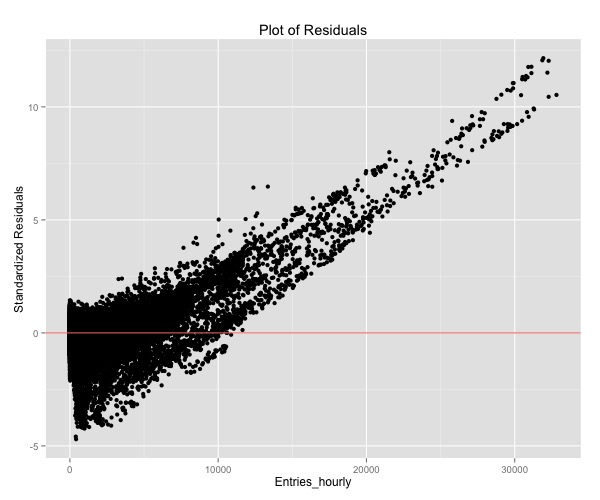

In [9]:
Image(filename='/Users/apple/Documents/Open_Course/UDACITY/Intro to Data Science/Final Project/Plot_of_Residuals(m1).jpeg')

Then I decided to apply Box-Cox transformation to the dependent variable, hoping to fix the problem of non-normal distributed residuals from the previous model. Again, I used R to find the optimal $\lambda$ value for the transformation.  
Box-Cox transformation is a common type of Power transforms, which is a useful data transformation technique used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association such as the Pearson correlation between variables and for other data stabilization procedures.

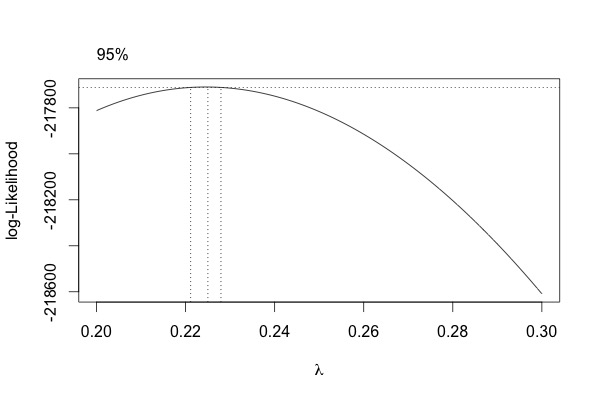

In [10]:
Image(filename='/Users/apple/Documents/Open_Course/UDACITY/Intro to Data Science/Final Project/lambda_loglikelihood.jpeg')

From the log-likelihood graph above, we can see the log-likelihood was maximized when $\lambda=0.225$. So I decided to fit another linear regression model with the all the same explanatory variables but Box-Cox transformed dependent variable of $\lambda=0.225$.

### <font color='#37A626'>The Second Model (with Box-Cox Transformation of the dependent variable and the same explanatory variables with the first model)</font>

In [8]:
y_bc = (y + 1)**0.225
result1 = sm.OLS(y_bc, X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     467.1
Date:                Thu, 29 Jan 2015   Prob (F-statistic):               0.00
Time:                        11:52:32   Log-Likelihood:                -51370.
No. Observations:               42649   AIC:                         1.033e+05
Df Residuals:                   42383   BIC:                         1.056e+05
Df Model:                         265                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        2.8643      0.065     44.357      0.000         2.738     2.991
C(hour)[T.4]                    -1.4487      0.013   -107.445      0.000        -1.475    -1.422
C(hour)[T.8]                    -0.7079      0.015    -48.406      0.000        -0.737    -0.679
C(hour)[T.12]                    1.1735      0.014     81.321      0.000         1.145     1.202
C(hour)[T.16]                    0.8245      0.014     58.039      0.000         0.797     0.852
C(hour)[T.20]                    0.9429      0.014     69.500      0.000         0.916     0.969
UNIT[T.R004]                     0.6665      0.087      7.620      0.000         0.495     0.838
UNIT[T.R005]                     0.6292      0.088      7.163      0.000         0.457     0.801
UNIT[T.R006]                     0.8978      0.087     10.335      0.000         0.728     1.068
UNIT[T.R007]                     0.3665      0.088      4.160      0.000         0.194     0.539
UNIT[T.R008]                     0.3839      0.088      4.352      0.000         0.211     0.557
UNIT[T.R009]                     0.3947      0.087      4.513      0.000         0.223     0.566
UNIT[T.R011]                     3.8899      0.087     44.949      0.000         3.720     4.060
UNIT[T.R012]                     4.2805      0.086     49.587      0.000         4.111     4.450
UNIT[T.R013]                     2.5159      0.086     29.145      0.000         2.347     2.685
UNIT[T.R016]                     0.9832      0.087     11.362      0.000         0.814     1.153
UNIT[T.R017]                     2.8683      0.086     33.227      0.000         2.699     3.037
UNIT[T.R018]                     4.1246      0.086     47.807      0.000         3.956     4.294
UNIT[T.R019]                     2.7133      0.086     31.479      0.000         2.544     2.882
UNIT[T.R020]                     3.2992      0.086     38.219      0.000         3.130     3.468
UNIT[T.R021]                     3.0193      0.087     34.888      0.000         2.850     3.189
UNIT[T.R022]                     4.2529      0.086     49.268      0.000         4.084     4.422
UNIT[T.R023]                     3.6233      0.086     41.975      0.000         3.454     3.793
UNIT[T.R024]                     2.8780      0.086     33.348      0.000         2.709     3.047
UNIT[T.R025]                     3.4709      0.086     40.268      0.000         3.302     3.640
UNIT[T.R027]                     2.2300      0.086     25.833      0.000         2.061     2.399
UNIT[T.R029]                     3.8007      0.086     44.029      0.000         3.631     3.970
UNIT[T.R030]                     2.5214      0.086     29.210      0.000         2.352     2.691
UNIT[T.R031]                     3.1874      0.086     36.925      0.000         3.018     3.357
UNIT[T.R032]                     3.0722      0.086     35.

Comparing the summary table of the second model with the first model, the value of $R^2$ was significantly improved and the skewness was reduced from $2.978$ to $-0.426$, which is far closer to zero. Skewness is a measurement of asymmetry of the distribution and of normal distribution the skewness is zero. So a good linear regression model should have the value of skewness close to zero.  
Then I examined the dependent variables versus residuals again. Although the residuals still not look like randomly distributed in the plot, the linear trend is not obvious any more (if there is any).

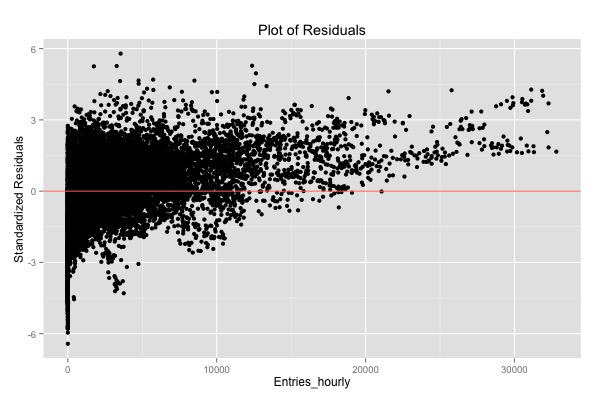

In [12]:
Image(filename='/Users/apple/Documents/Open_Course/UDACITY/Intro to Data Science/Final Project/Plot_of_Residuals(m2).jpeg')

## <font color='1AA3D9'>Section 3. Visualization</font>

Please include two visualizations that show the relationships between two or more variables in the NYC subway data. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots, or histograms) or attempt to implement something more advanced if you'd like.  
Remember to add appropriate titles and axes labels to your
plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.   
1. One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days. You can combine the two histograms in a single plot or you can use two different plots.  
For the histogram, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, you might have one interval (along the x-axis) with values from 0 to 1000. The height of the bar for this interval will then represent the number of records (rows in our data) that have ENTRIESn_hourly that fall into this interval.  
Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.
2. One visualization can be more freeform, some suggestions are:  
  a. Ridership by time-of-day or day-of-week  
  b. How ridership varies by subway station  
  c. Which stations have more exits or entries at different times of day  

### Two histograms: one of ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days

**Step1: Revalue the variable of 'rain'**

In [10]:
turnstile.rain[turnstile.rain==0] = 'Non-rainy'
turnstile.rain[turnstile.rain==1] = 'Rainy'

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Step2: Plotting**

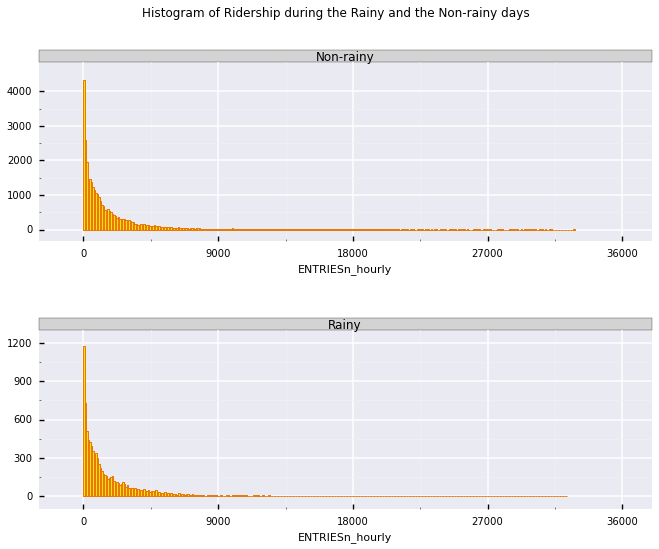

<ggplot: (287882697)>

In [23]:
ggplot(turnstile, aes(x='ENTRIESn_hourly')) + \
ggtitle("Histogram of Ridership during the Rainy and the Non-rainy days") + \
geom_histogram(binwidth=100, fill='#FFE10A', color='#E87807') + \
facet_wrap('rain') + \
theme_seaborn(style='darkgrid')

The shapes of both distributions are both highly skewed right. While the long tails are not quite of my interest, I narrowed the scope of the x-axis to the maximum of 10000 and redrew the graphic again to take a closer look at the part I interested most. 

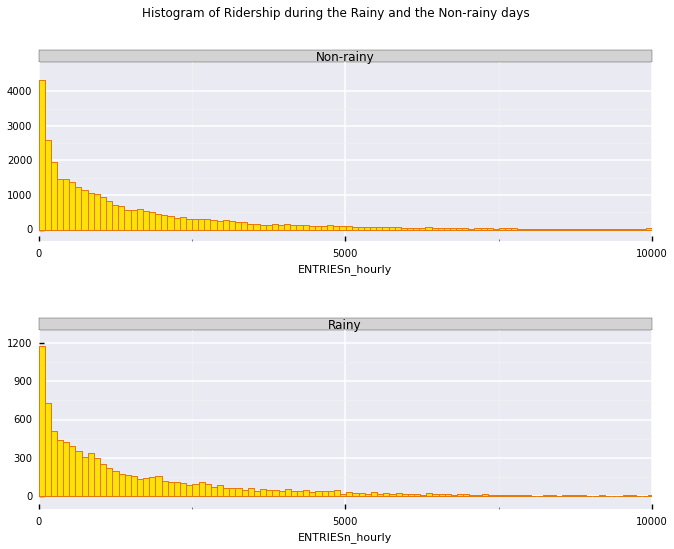

<ggplot: (289617997)>

In [24]:
ggplot(turnstile, aes(x='ENTRIESn_hourly')) + \
ggtitle("Histogram of Ridership during the Rainy and the Non-rainy days") + \
geom_histogram(binwidth=100, fill='#FFE10A', color='#E87807') + \
xlim(0, 10000) + \
facet_wrap('rain') + \
theme_seaborn(style='darkgrid')

From the histograms above, the only big difference I noticed is that the value of y-axis of the data of non-rainy days are much higher than that of the rainy days. But that can be explained by there were more days that didn't rain than did rain in NYC in our dataset.

### Two Box plots: ENTRIESn_hourly for rainy days and non-rainy days

Another way allows us to take a quickly look the distribution of ENTRIESn_hourly is boxplot. 

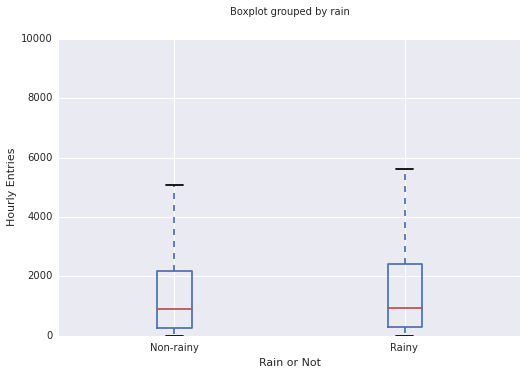

In [39]:
p1 = turnstile.boxplot('ENTRIESn_hourly','rain')
q11 = p1.set_xlabel('Rain or Not')
q12 = p1.set_ylabel('Hourly Entries')
q13 = p1.set_title('                          ')
q14 = p1.set_ylim(0,10000)

From the plots above, I can't really see a difference between two groups. Except for the range(between two whiskers) of the data on rainy days is slightly larger than its non-rainy counterpart. So I decided to narrow down the limit of y-axis and take a closer look at those data between the first and the third quartiles.

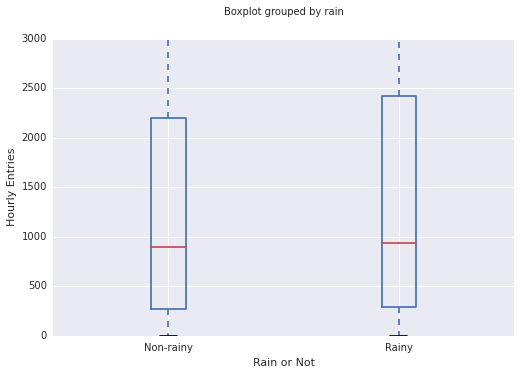

In [38]:
p2 = turnstile.boxplot('ENTRIESn_hourly','rain')
q20 = p2.set_ylim(0,3000)
q21 = p2.set_xlabel('Rain or Not')
q22 = p2.set_ylabel('Hourly Entries')
q23 = p2.set_title('                          ')

After narrowing the y-axis to (0,3000), we can see clearly all the first quartile, the median and the third quartile of the hourly entries of rainy days are higher then those of non-rainy days.

### Ridership by day-of-week

**Step1: Build New Data Frame for Plotting ridership for day of week**

In [11]:
day_week_ridership = pd.melt(turnstile, id_vars=['day_week'], value_vars=['ENTRIESn_hourly'])
# Revalue 'day_week'
#day_of_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
#for i in range(0,7):
#    day_week_ridership.day_week[day_week_ridership.day_week == i] = day_of_week[i]

**Step2: Plotting**

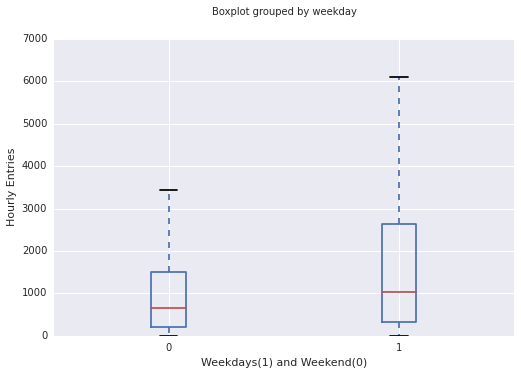

In [13]:
p3 = turnstile.boxplot(column='ENTRIESn_hourly', by='weekday')
q31 = p3.set_xlabel('Weekdays(1) and Weekend(0)')
q32 = p3.set_ylabel('Hourly Entries')
q33 = p3.set_ylim(0, 7000)
q34 = p3.set_title('                          ')

The boxplots above tell us there are more people taking subway during the weekdays (Mon-Fri).

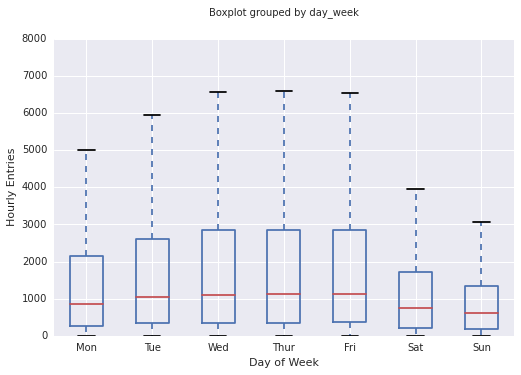

In [25]:
p2 = day_week_ridership.boxplot(column='value', by='day_week')
q21 = p2.set_xlabel('Day of Week')
q22 = p2.set_ylabel('Hourly Entries')
q23 = p2.set_ylim(0, 8000)
q24 = p2.set_title('                          ')
q25 = p2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

If we draw one box plot for each day of the week, we can see there is the smallest volume of riders in the subway on Sunday and the second smallest on Saturday. Surprisingly, less people take subway on Monday comparing to other weekdays.

## <font color='1AA3D9'>Section 4. Conclusion</font>

_Please address the following questions in detail. Your answers should be 1-2 paragraphs long._
1. From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining versus when it is not raining?    
2. What analyses lead you to this conclusion?  

From the result of the Mann–Whitney U test, the two-tailed p-value is 5.48213914249e-06, which indicates the probability of the distributions of $ENTRIESn\_hourly_{rainy}$ and $ENTRIESn\_hourly_{non-rainy}$ are the same is less than $\alpha$. So there's a statistical significant difference between the riderships of rainy and non-rainy days. 
Furthermore, all the descriptive listed (including 1st quartile, median, mean and 3rd quartile) of rainy days are greater than those of non-rainy days and the same information also shows in the box plots. Therefore, I conclude that there are more people ride the NYC subway when it is raining versus when it is not raining.

## <font color='1AA3D9'>Section 5. Reflection</font>

_Please address the following questions in detail. Your answers should be 1-2 paragraphs long._
1. Please discuss potential shortcomings of the data set and the methods 
of your analysis.
2. (Optional) Do you have any other insight about the dataset that you would like to share with us?

After plotting several box plots and histograms, I think for the purpose of comparing the distributions of different groups the box plots do a better job than histograms. So I will go with box plots next time I need to compare different distributions. But I do like how histograms give me more control, such as adjusting the width of the bars etc, so that I can get the information of the distribution I am looking for, but probably not for comparison purpose.

I explained how I got the two regression models in details from the regression section. Even though the second model was improved in terms of the $R^2$, skewness and some other measurement of the model, I think there is still something missing in the second model. Maybe it is the interaction between two or more explanatory variables, or some transformation of some explanatory variables, or some other variables, which are not in the dataset, need be to added to the model. The expertise knowledge is desperately needed to improve my model.  
I would like to add another variable to indicate whether a certain day was a holiday or not. According to the previous analysis, whether a day is weekend or not makes a big difference in the volume of the ridership. So it is reasonable to analyze if a holiday usually witnesses a change of the volume of the ridership of NYC subway. For the weather in May, there may have not been many extreme weather conditions, but if we expand the timespan of the dataset I think it would be a good idea to add the weather information about the extreme weather, such as snowstorm in the winter time.

## <font color='1AA3D9'>Section 6. References</font>

 - Statistical Data Analysis in Python https://github.com/fonnesbeck/statistical-analysis-python-tutorial
 - The Wikipedia page of Mann–Whitney U test http://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
 - The Wikipedia page of Skewness http://en.wikipedia.org/wiki/Skewness
 - The Wikipedia page of Power transform http://en.wikipedia.org/wiki/Power_transform#Box.E2.80.93Cox_transformation
 - One-tail vs. two-tail P values http://graphpad.com/guides/prism/6/statistics/index.htm?one-tail_vs__two-tail_p_values.htm
 - [Python for Data Analysis, By Wes McKinney, 2012](http://shop.oreilly.com/product/0636920023784.do)